#**Proyecto Línea de Comando**
## Análisis de Sentimientos

In [5]:
import io
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Gift_Cards_reviews.jsonl to Gift_Cards_reviews.jsonl


###Leyendo los datos desde un archivo json.
###Procedemos a normalzar el texto convirtiendo en mayusculas cada palabra.

In [6]:
import json
import string
import pandas as pd
# Lista para almacenar los valores de "text"
texts = []

# Leer el archivo JSONL
with open('Gift_Cards_reviews.jsonl', 'r') as file:
    for line in file:
        review = json.loads(line.strip())  # Eliminar el salto de línea
        # Convert the 'review' dictionary to a JSON string and then to uppercase
        #texts.append(review["text"].upper())
        text = review["text"].upper().translate(str.maketrans('', '', string.punctuation + '¡¿'))
        texts.append(text)
# Imprimir la lista de textos
print(texts)
print(len(texts))

df = pd.DataFrame(texts, columns=['text'])
df.head()


['HAVING AMAZON MONEY IS ALWAYS GOOD', 'ALWAYS THE PERFECT GIFT  I HAVE NEVER GIVEN ONE AND HAD SOMEONE SEEM OR ACT DISAPPOINTED  JUST THE OPPOSITE  THEY ARE THRILLED AND EXCITED TO HAVE A BIT OF A SPREE  ALWAYS THE PERFECT SIZE AND COLOR  ARRIVES IN 1 DAY IN MOST CASES  SO ITS NEVER TOO LATE  LOTS OF CARDS TO CHOSE FROM THANK YOU BIRTHDAY WEDDINGBABY  AND MANY THAT WORK FOR MANY OCCASIONS', 'WHEN YOU HAVE A PERSON WHO IS HARD TO SHOP FOR AN AMAZON GIFT CARD IS P E R F E C T  MAN OR WOMAN  NO MATTER WHAT THEIR HOBBY LIFESTYLE OR AGE  ALL YOU HAVE TO DO IS PICK THE   DONT FORGET TO MENTION THAT IT IS A GIFT WHEN YOU CHECK OUT  YOU WILL HAVE SOME GIFT CARD OPTIONS  IVE ORDERED MANY OF THESE OVER YEARS  THEY ARE ALWAYS RECEIVED WITH GLEE  WOO HOO  IF YOURE LOOKING FOR A GREAT FIT FOR ME  THIS IS JUST MY SIZE    BEST TO ALL', 'THE TIN IS A NICE TOUCH AND PRETTY LARGE  ITS ABOUT 434 IN DIAMETER AND ABOUT 1234 THICK  I ADDED A PRETTY RED RIBBON AND IT IS PERFECT  WHO DOESNT LOVE SHOPPING ON 

,text
0,HAVING AMAZON MONEY IS ALWAYS GOOD
1,ALWAYS THE PERFECT GIFT I HAVE NEVER GIVEN ON...
2,WHEN YOU HAVE A PERSON WHO IS HARD TO SHOP FOR...
3,THE TIN IS A NICE TOUCH AND PRETTY LARGE ITS ...
4,I BOUGHT THIS PACK OF STARBUCKS GIFT CARDS IN ...


###Procedemos a realizar la tokenización de la lista

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet') #using the wordNet dictionary


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize

tokens = [word_tokenize(i) for i in texts]
for i in tokens:
    print(i)

['HAVING', 'AMAZON', 'MONEY', 'IS', 'ALWAYS', 'GOOD']
['ALWAYS', 'THE', 'PERFECT', 'GIFT', 'I', 'HAVE', 'NEVER', 'GIVEN', 'ONE', 'AND', 'HAD', 'SOMEONE', 'SEEM', 'OR', 'ACT', 'DISAPPOINTED', 'JUST', 'THE', 'OPPOSITE', 'THEY', 'ARE', 'THRILLED', 'AND', 'EXCITED', 'TO', 'HAVE', 'A', 'BIT', 'OF', 'A', 'SPREE', 'ALWAYS', 'THE', 'PERFECT', 'SIZE', 'AND', 'COLOR', 'ARRIVES', 'IN', '1', 'DAY', 'IN', 'MOST', 'CASES', 'SO', 'ITS', 'NEVER', 'TOO', 'LATE', 'LOTS', 'OF', 'CARDS', 'TO', 'CHOSE', 'FROM', 'THANK', 'YOU', 'BIRTHDAY', 'WEDDINGBABY', 'AND', 'MANY', 'THAT', 'WORK', 'FOR', 'MANY', 'OCCASIONS']
['WHEN', 'YOU', 'HAVE', 'A', 'PERSON', 'WHO', 'IS', 'HARD', 'TO', 'SHOP', 'FOR', 'AN', 'AMAZON', 'GIFT', 'CARD', 'IS', 'P', 'E', 'R', 'F', 'E', 'C', 'T', 'MAN', 'OR', 'WOMAN', 'NO', 'MATTER', 'WHAT', 'THEIR', 'HOBBY', 'LIFESTYLE', 'OR', 'AGE', 'ALL', 'YOU', 'HAVE', 'TO', 'DO', 'IS', 'PICK', 'THE', 'DONT', 'FORGET', 'TO', 'MENTION', 'THAT', 'IT', 'IS', 'A', 'GIFT', 'WHEN', 'YOU', 'CHECK', 'OUT', 'YOU

###Buscamos las palabras que solo sirven para dar estructura a la oración.

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

clean_data_1 = []

for words in tokens:
  if not words in stopwords.words('english'):
    clean_data_1.append(words)

#clean_data_1


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


###Continuamos con la lematización para el procesamiento de texto en lenguaje natural.

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
all_words = [word for sublist in clean_data_1 for word in sublist]
stemmed_data = [stemmer.stem(word) for word in all_words]

#stemmed_data

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
lemmer = nltk.stem.WordNetLemmatizer()
nltk.download('wordnet')

#Armamos una lista que contendra las lematizaciones.
lemm_data = []
# Iteramos por cada palabra de las oraciones de clean_data
for sublist in clean_data_1:
  # Iteramos por cada palabra en la sublista
  for word in sublist:
    lemm_data.append(lemmer.lemmatize(word)) # Lematización individual

#lemm_data

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import nltk
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger_eng')
pos_data = pos_tag(lemm_data)
#pos_data

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


###Procederemos a realizar un analisis de sentimientos mediante el metodo VADER.

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
##Generamos los scores para cada oración del archivo
df['scores'] = df['text'].apply(lambda text: sid.polarity_scores(text))
df = pd.concat([df.drop(['scores'], axis=1), df['scores'].apply(pd.Series)], axis=1)

df.head()
#pd.DataFrame(df['scores'].tolist()).add_prefix('score_')
#pd.DataFrame(df['scores'].tolist())

,text,neg,neu,pos,compound
0,HAVING AMAZON MONEY IS ALWAYS GOOD,0.000,0.465,0.535,0.5574
1,ALWAYS THE PERFECT GIFT I HAVE NEVER GIVEN ON...,0.041,0.722,0.238,0.9325
2,WHEN YOU HAVE A PERSON WHO IS HARD TO SHOP FOR...,0.034,0.671,0.295,0.9791
3,THE TIN IS A NICE TOUCH AND PRETTY LARGE ITS ...,0.030,0.569,0.400,0.9847
4,I BOUGHT THIS PACK OF STARBUCKS GIFT CARDS IN ...,0.042,0.770,0.188,0.9694


In [ ]:
result = []
for value in df['compound']:
    if value >= 0 and value <=0.3:
        result.append("Insatisfecho")
    elif value >0.3 and value <=0.5:
        result.append("Neutral")
    else:
        result.append("Satisfecho")

df["Categoria"] = result
print(df)

                                                 text    neg    neu    pos  \
0                  HAVING AMAZON MONEY IS ALWAYS GOOD  0.000  0.465  0.535   
1   ALWAYS THE PERFECT GIFT  I HAVE NEVER GIVEN ON...  0.041  0.722  0.238   
2   WHEN YOU HAVE A PERSON WHO IS HARD TO SHOP FOR...  0.034  0.671  0.295   
3   THE TIN IS A NICE TOUCH AND PRETTY LARGE  ITS ...  0.030  0.569  0.400   
4   I BOUGHT THIS PACK OF STARBUCKS GIFT CARDS IN ...  0.042  0.770  0.188   
..                                                ...    ...    ...    ...   
95  USUALLY I EITHER RECEIVE AN AMAZON GIFT CARD A...  0.027  0.809  0.164   
96                                       LOVE MY CARD  0.000  0.323  0.677   
97  IT’S EASY TO USE AND VERY CONVENIENT I WOULD D...  0.000  0.689  0.311   
98    VERY EASY TO USE I WISH I KNEW ABOUT IT EARLIER  0.000  0.543  0.457   
99                         SENT IN A LOVELY CONTAINER  0.000  0.441  0.559   

    compound   Categoria  
0     0.5574  Satisfecho  
1     0.9

###Procedemos a graficar los resultados

Text(0.5, 1.0, 'Análisis de Sentimientos')

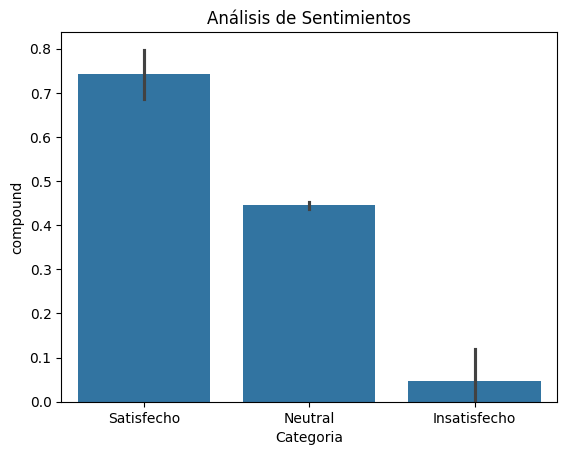

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sent = sns.barplot(data=df, x='Categoria', y='compound')
plt.title('Análisis de Sentimientos')

###Procederemos a realizar el análisis de sentimientos con el modelo Bert

In [1]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline


In [2]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
clasificador = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)


Device set to use cpu


In [8]:
resultado = clasificador(texts)
print(resultado)

[{'label': 'LABEL_0', 'score': 0.6050628423690796}, {'label': 'LABEL_0', 'score': 0.6478878855705261}, {'label': 'LABEL_0', 'score': 0.6753416061401367}, {'label': 'LABEL_0', 'score': 0.6593236923217773}, {'label': 'LABEL_0', 'score': 0.7233104109764099}, {'label': 'LABEL_0', 'score': 0.5425915122032166}, {'label': 'LABEL_0', 'score': 0.6480182409286499}, {'label': 'LABEL_0', 'score': 0.6805179119110107}, {'label': 'LABEL_0', 'score': 0.5554937720298767}, {'label': 'LABEL_0', 'score': 0.6464649438858032}, {'label': 'LABEL_0', 'score': 0.6893414258956909}, {'label': 'LABEL_0', 'score': 0.6898791193962097}, {'label': 'LABEL_0', 'score': 0.6910879611968994}, {'label': 'LABEL_0', 'score': 0.7383802533149719}, {'label': 'LABEL_0', 'score': 0.6881146430969238}, {'label': 'LABEL_0', 'score': 0.5869935154914856}, {'label': 'LABEL_0', 'score': 0.5868040323257446}, {'label': 'LABEL_0', 'score': 0.60727459192276}, {'label': 'LABEL_0', 'score': 0.5534563064575195}, {'label': 'LABEL_0', 'score': 0.

In [9]:
result = []
for val in resultado:
    if val['score'] >= 0 and val['score'] <=0.3:
        result.append("Insatisfecho")
    elif val['score'] >0.3 and val['score'] <=0.5:
        result.append("Neutral")
    else:
        result.append("Satisfecho")

df = pd.DataFrame(texts, columns=['text'])
df["Categoria"] = result
df['Score'] = [val['score'] for val in resultado]


In [10]:
df

,text,Categoria,Score
0,HAVING AMAZON MONEY IS ALWAYS GOOD,Satisfecho,0.605063
1,ALWAYS THE PERFECT GIFT I HAVE NEVER GIVEN ON...,Satisfecho,0.647888
2,WHEN YOU HAVE A PERSON WHO IS HARD TO SHOP FOR...,Satisfecho,0.675342
3,THE TIN IS A NICE TOUCH AND PRETTY LARGE ITS ...,Satisfecho,0.659324
4,I BOUGHT THIS PACK OF STARBUCKS GIFT CARDS IN ...,Satisfecho,0.723310
...,...,...,...
95,USUALLY I EITHER RECEIVE AN AMAZON GIFT CARD A...,Satisfecho,0.704942
96,LOVE MY CARD,Satisfecho,0.663606
97,IT’S EASY TO USE AND VERY CONVENIENT I WOULD D...,Satisfecho,0.551822
98,VERY EASY TO USE I WISH I KNEW ABOUT IT EARLIER,Satisfecho,0.586516


TypeError: 'Text' object is not callable

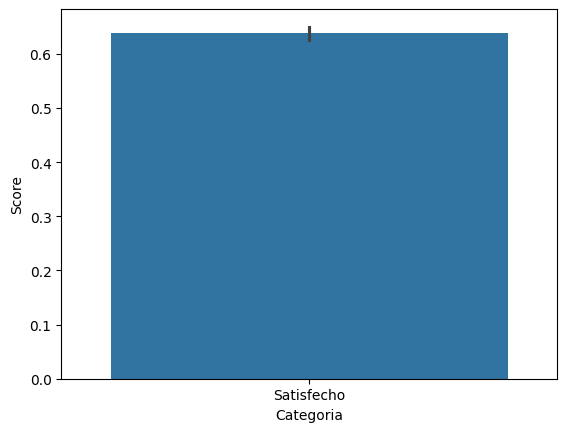

In [13]:
import seaborn as sns

sent = sns.barplot(data=df, x='Categoria', y='Score')
sent.title('Análisis de Sentimientos')
